<a href="https://colab.research.google.com/github/Samkhan705279/British-Airways-Data-Science-project/blob/main/task_1_british_airways_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head(10)

,reviews
0,✅ Trip Verified | Absolutely PATHETIC business...
1,Not Verified | Overall not bad. Staff look ti...
2,✅ Trip Verified | This was our first flight wi...
3,✅ Trip Verified | I recently encountered a hig...
4,Not Verified | Beware! BA don't provide any r...
5,✅ Trip Verified | Check in was chaotic and ba...
6,Not Verified | All 4 of our flights were fine ...
7,cNot Verified | I had hoped this would be a g...
8,✅ Trip Verified | I was going to fly to Frank...
9,✅ Trip Verified | Much better experience this ...


In [ ]:
import pandas as pd

# Split the text and select the part before the "|"
df['reviews'] = df['reviews'].str.split('|').str[1].str.strip()



In [ ]:
# Display the result
df

,reviews
0,Absolutely PATHETIC business class product. BA...
1,Overall not bad. Staff look tired and overwork...
2,This was our first flight with British Airways...
3,I recently encountered a highly disappointing ...
4,Beware! BA don't provide any refund due to a v...
...,...
995,Flown with British Airways on numerous occasio...
996,Flying last Sunday from Geneva to Piladelphia ...
997,London Heathrow to Paris CDG. Quick and easy f...
998,Johannesburg to London. At Johannesburg used B...


In [ ]:
import os

# Check if the 'data' directory exists, and create it if not
directory = 'data'
if not os.path.exists(directory):
    os.makedirs(directory)

# Now you can save the DataFrame to the CSV file
df.to_csv(os.path.join(directory, "BA_reviews.csv"))


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Absolutely PATHETIC business class product. BA...,Absolutely PATHETIC business class product BA ...
1,Overall not bad. Staff look tired and overwork...,Overall not bad Staff look tired and overworke...
2,This was our first flight with British Airways...,This was our first flight with British Airways...
3,I recently encountered a highly disappointing ...,I recently encountered a highly disappointing ...
4,Beware! BA don't provide any refund due to a v...,Beware BA don t provide any refund due to a ve...


In [ ]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words,
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,reviews,Cleaned Reviews,POS tagged
0,Absolutely PATHETIC business class product. BA...,Absolutely PATHETIC business class product BA ...,"[(Absolutely, r), (PATHETIC, n), (business, n)..."
1,Overall not bad. Staff look tired and overwork...,Overall not bad Staff look tired and overworke...,"[(Overall, a), (bad, a), (Staff, n), (look, n)..."
2,This was our first flight with British Airways...,This was our first flight with British Airways...,"[(first, a), (flight, n), (British, a), (Airwa..."
3,I recently encountered a highly disappointing ...,I recently encountered a highly disappointing ...,"[(recently, r), (encountered, v), (highly, r),..."
4,Beware! BA don't provide any refund due to a v...,Beware BA don t provide any refund due to a ve...,"[(Beware, n), (BA, n), (provide, None), (refun..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Absolutely PATHETIC business class product. BA...,Absolutely PATHETIC business class product BA ...,"[(Absolutely, r), (PATHETIC, n), (business, n)...",Absolutely PATHETIC business class product B...
1,Overall not bad. Staff look tired and overwork...,Overall not bad Staff look tired and overworke...,"[(Overall, a), (bad, a), (Staff, n), (look, n)...",Overall bad Staff look tire overwork try bes...
2,This was our first flight with British Airways...,This was our first flight with British Airways...,"[(first, a), (flight, n), (British, a), (Airwa...",first flight British Airways year usual faul...
3,I recently encountered a highly disappointing ...,I recently encountered a highly disappointing ...,"[(recently, r), (encountered, v), (highly, r),...",recently encounter highly disappointing expe...
4,Beware! BA don't provide any refund due to a v...,Beware BA don t provide any refund due to a ve...,"[(Beware, n), (BA, n), (provide, None), (refun...",Beware BA provide refund due serious medical...


In [ ]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Absolutely PATHETIC business class product. BA...,Absolutely PATHETIC business class product B...
1,Overall not bad. Staff look tired and overwork...,Overall bad Staff look tire overwork try bes...
2,This was our first flight with British Airways...,first flight British Airways year usual faul...
3,I recently encountered a highly disappointing ...,recently encounter highly disappointing expe...
4,Beware! BA don't provide any refund due to a v...,Beware BA provide refund due serious medical...
...,...,...
995,Flown with British Airways on numerous occasio...,Flown British Airways numerous occasion issu...
996,Flying last Sunday from Geneva to Piladelphia ...,Flying last Sunday Geneva Piladelphia via Lo...
997,London Heathrow to Paris CDG. Quick and easy f...,London Heathrow Paris CDG Quick easy flight ...
998,Johannesburg to London. At Johannesburg used B...,Johannesburg London Johannesburg use BA gall...


In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Absolutely PATHETIC business class product. BA...,Absolutely PATHETIC business class product BA ...,"[(Absolutely, r), (PATHETIC, n), (business, n)...",Absolutely PATHETIC business class product B...,0.9507,Positive
1,Overall not bad. Staff look tired and overwork...,Overall not bad Staff look tired and overworke...,"[(Overall, a), (bad, a), (Staff, n), (look, n)...",Overall bad Staff look tire overwork try bes...,0.6682,Positive
2,This was our first flight with British Airways...,This was our first flight with British Airways...,"[(first, a), (flight, n), (British, a), (Airwa...",first flight British Airways year usual faul...,0.9698,Positive
3,I recently encountered a highly disappointing ...,I recently encountered a highly disappointing ...,"[(recently, r), (encountered, v), (highly, r),...",recently encounter highly disappointing expe...,-0.9591,Negative
4,Beware! BA don't provide any refund due to a v...,Beware BA don t provide any refund due to a ve...,"[(Beware, n), (BA, n), (provide, None), (refun...",Beware BA provide refund due serious medical...,0.8555,Positive


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    482
Negative    410
Neutral     108
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x77fdc032a110>,
 [Text(0.06217041096298438, 1.0982417038160106, 'Positive'),
  Text(-0.42414244547964414, -1.0149399913012331, 'Negative'),
  Text(1.2730371984675077, -0.44930645590509777, 'Neutral')],
 [Text(0.03391113325253693, 0.5990409293541875, '48.2%'),
  Text(-0.2313504248070786, -0.5536036316188544, '41.0%'),
  Text(0.8015419397758381, -0.2828966574217282, '10.8%')])

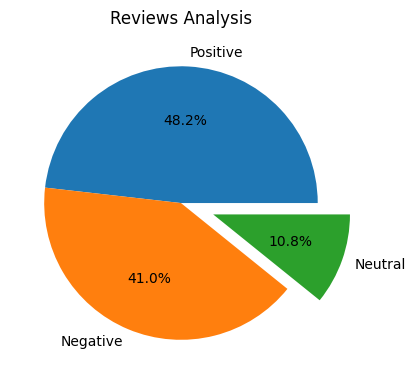

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")

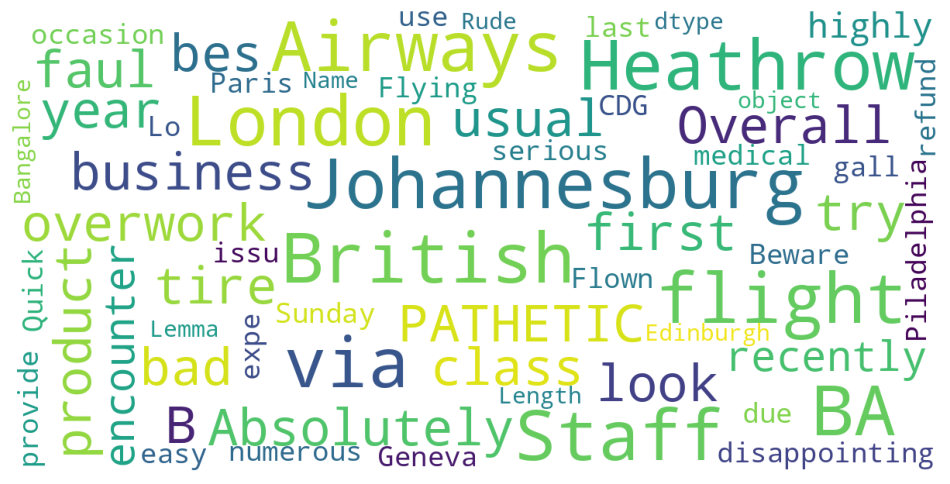

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=250,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)